In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
forest=pd.read_csv(r"C:\Users\manda\OneDrive\Desktop\Data Science\Machine learning assignment\Support Vector Machine\forestfires.csv")

In [4]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
forest[['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue']].head()

,dayfri,daymon,daysat,daysun,daythu,daytue
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0


In [6]:
forest.info()
# No null values present in the dataset till now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [11]:
forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],inplace=True,axis=1)

In [12]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [18]:
forest['month']=le.fit_transform(forest['month'])
forest['day']=le.fit_transform(forest['day'])


In [19]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [20]:
X=forest.iloc[:,:-1]
y=forest.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [25]:
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [26]:
x_train

array([[-1.12471104,  0.14528654,  0.24643515, ..., -1.00940067,
        -0.07006898, -0.24574361],
       [-1.12471104, -0.37532357,  0.63964761, ..., -0.00231315,
        -0.07006898, -0.24574361],
       [ 1.17583427, -0.37532357,  0.47580909, ..., -0.72965414,
        -0.07006898, -0.21471234],
       ...,
       [-1.12471104,  1.18650676,  0.26281901, ..., -0.50585691,
        -0.07006898, -0.23469138],
       [-0.20449292, -0.37532357,  0.04982893, ..., -1.2331979 ,
        -0.07006898, -0.24574361],
       [-1.12471104,  1.18650676,  0.70518302, ..., -0.00231315,
        -0.07006898, -0.24574361]])

In [27]:
x_test

array([[ 0.48567068, -0.37532357, -0.88405066, ...,  0.50123061,
        -0.07006898, -0.24574361],
       [-1.12471104,  1.18650676,  0.9181731 , ...,  0.50123061,
         2.34030399, -0.24574361],
       [-1.12471104, -0.89593368,  0.26281901, ..., -1.2331979 ,
        -0.07006898, -0.21960083],
       ...,
       [ 1.17583427, -0.89593368,  0.18089974, ..., -1.00940067,
        -0.07006898, -0.16221423],
       [ 1.17583427,  1.18650676, -0.03209034, ...,  0.50123061,
        -0.07006898, -0.24574361],
       [-0.89465651, -0.89593368, -0.8348991 , ...,  2.51540565,
        -0.07006898,  0.22248856]])

In [28]:
from sklearn.svm import SVC

In [29]:
model=SVC(kernel='linear', C=1.0, random_state=42)

In [30]:
model.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [35]:
y_pred=model.predict(x_test)

In [53]:
y_pred

array(['small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'large',
       'large', 'large', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'large', 'large', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'large', 'large', 'small', 'large', 'small', 'small',
       'small', 'sma

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_pred,y_test)

0.9307692307692308

In [50]:
from sklearn.metrics import confusion_matrix
z=confusion_matrix(y_test,y_pred)
z

array([[26,  9],
       [ 0, 95]], dtype=int64)

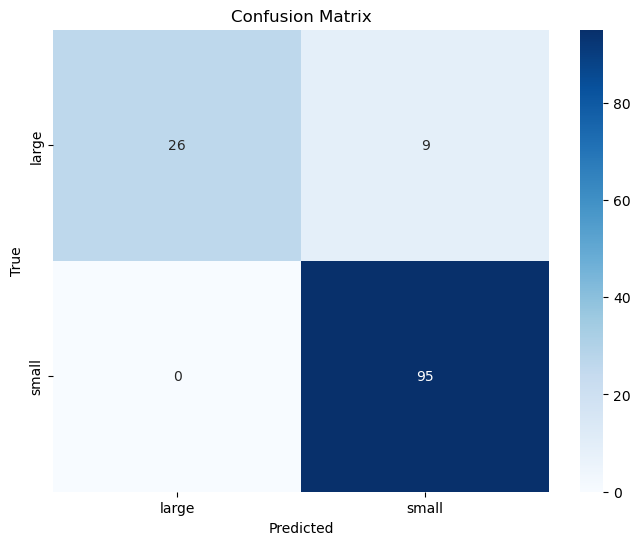

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(z, annot=True, cmap='Blues', fmt='d', xticklabels=['large','small'], yticklabels=['large','small'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()